In [1]:
from google.colab import drive

drive.mount("/content/gdrive")
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
solution_df = pd.read_csv("gdrive/MyDrive/Dataset/wids/solution_template.csv")


train_df = pd.read_csv("gdrive/MyDrive/Dataset/wids/train.csv")
test_df = pd.read_csv("gdrive/MyDrive/Dataset/wids/test.csv")





Mounted at /content/gdrive


In [2]:
train_df.head(3)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,...,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,...,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,...,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,...,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157


In [3]:
test_df.head(3)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,...,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,...,47.82,46.06,41.02,36.88,53.32,62.65,71.13,80.07,81.51,78.66,74.25,61.83,56.03,57.19,40.54,45.32,58.82,60.88,68.38,80.50,82.77,84.21,78.16,65.16,56.42,45.52,47.71,53.46,55.10,69.36,73.91,76.61,81.56,79.72,74.17,64.97,52.08,44.83,37.80,54.41,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,1742,Malignant neoplasm of upper-inner quadrant of ...,C773,NaN,NaN,18716.73,1019.51,30.37,11.00,18.86,23.11,12.24,9.88,9.12,8.38,4.78,2.62,50.29,49.71,35.99,12.76,46.65,4.63,3.15,54.23,48238.92,6.12,4.73,6.70,4.86,6.21,11.19,13.28,16.98,10.42,11.80,7.68,19.48,25137.57,47.85,...,47.76,44.48,39.89,44.84,53.74,62.94,66.78,77.33,81.05,80.61,76.61,64.45,51.58,45.28,42.63,50.48,57.99,62.86,68.77,78.96,84.92,78.40,73.11,68.57,55.73,43.39,44.61,53.68,59.69,63.29,69.40,79.94,81.16,76.74,73.08,62.92,56.09,43.79,42.14,46.48,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13


In [4]:
solution_df.head(3)

,patient_id,metastatic_diagnosis_period
0,730681,100
1,334212,0
2,571362,100


In [ ]:
# Describing the data
train_df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,...,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13173.000000,13168.000000,13173.000000,1.316800e+04,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,13173.000000,13167.000000,13161.000000,13161.00000,13145.000000,13173.000000,13173.000000,13173.000000,13151.000000,13173.000000,13157.000000,13157.000000,13155.000000,13157.000000,13157.000000,13173.000000,13173.000000,13154.000000,13173.000000,13157.000000,13173.000000,13173.000000,13173.000000,13170.000000,13160.000000,13164.000000,13173.000000,13173.000000,13173.000000,13173.000000,13172.000000,13142.000000,13173.000000,13163.000000,13152.000000,13168.000000,13173.000000,13173.000000,13168.000000,13167.000000,13173.000000,13173.000000,13164.000000,13127.000000,13157.000000,13166.000000,13166.000000,13161.000000,13140.000000,13173.000000
mean,555441.784939,568.530859,59.271313,29.168808,20651.373928,1776.872376,40.542676,11.104988,12.857587,13.297375,12.893557,12.063957,13.458827,12.631076,7.670396,4.021445,50.094310,49.905878,47.645569,12.688142,33.819417,5.846155,3.196401,51.800184,74149.173616,3.286397,2.535715,4.159681,3.943212,4.081337,8.428095,11.586349,16.906539,12.671315,15.806551,16.595873,32.402666,36606.228237,65.895238,7589.209077,3.373791e+05,1230.443146,31.233619,11.933390,27.687036,28.874659,19.263585,12.243182,31.506428,43.302040,...,42.954875,36.974767,34.759469,47.52108,57.004955,65.244507,72.620689,75.560679,75.125510,72.271894,61.211773,51.595938,47.010274,37.472639,43.529698,51.631609,56.419806,63.375224,73.644230,77.270195,76.562339,71.436420,61.991704,52.612660,40.281865,40.719157,46.279066,48.901873,59.008388,63.444372,72.434105,76.757869,73.938746,70.144358,61.822501,49.864691,40.152299,36.800997,43.061795,46.074308,52.411982,67.932236,73.074635,77

In [7]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00


In [8]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import time
from scipy.stats import linregress


#Data Preprocessing

- Remove columns having high count of null values
- Remove patients gender
- Replacing the null values

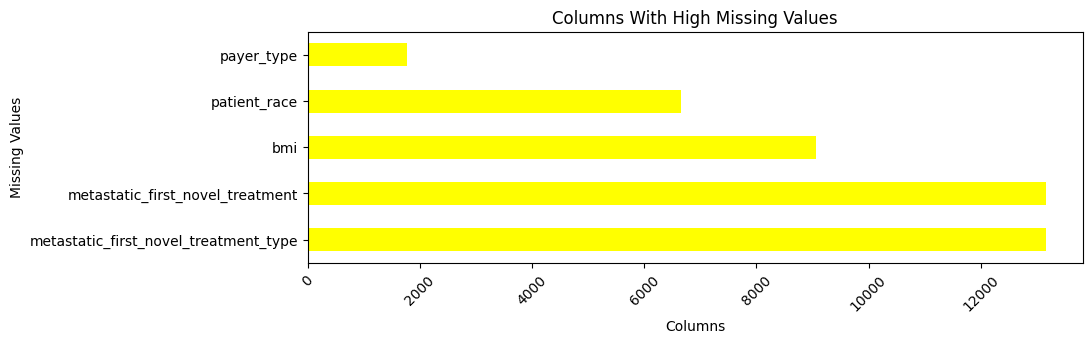

In [ ]:
# Display Columns that contains high missing values
plt.figure(figsize = (10,3))
missing_values = train_df.isna().sum().sort_values(ascending = False)
missing_values.head(5).plot(kind = 'barh', color = 'yellow')
plt.title('Columns With High Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation = 45)
plt.ylabel('Missing Values')
plt.show()

In [ ]:
# Dropping Columns that Contains high missing values
df = train_df.drop(['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type', 'patient_gender'],axis = 1)
test_df = test_df.drop(['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type', 'patient_gender'],axis = 1)

In [ ]:
# Fixing zip that are bad
df['patient_state'] = np.where(df['patient_zip3'] == 630, 'MO', np.where(df['patient_zip3'] == 864,'AZ', df['patient_state']))
# test_df['patient_state'] = np.where(df['patient_zip3'] == 630, 'MO', np.where(df['patient_zip3'] == 864,'AZ', df['patient_state']))
# Male Code to female
df['breast_cancer_diagnosis_code'] = df['breast_cancer_diagnosis_code'].replace({
    'C50122':'C50112', 'C50221':'C50211', 'C50421':'C50411', 'C509':'C5091', 'C50922':'C50912'
})

# Fixing code in test data frame
test_df['breast_cancer_diagnosis_code'] = test_df['breast_cancer_diagnosis_code'].replace({
    'C50122':'C50112', 'C50221':'C50211', 'C50421':'C50411', 'C509':'C5091', 'C50922':'C50912'

})
# Recode categories in test data
test_df['breast_cancer_diagnosis_code'] = test_df['breast_cancer_diagnosis_code'].replace({'C5021':'C50219'})

In [ ]:
# population cols
pop_cols = df.loc[:, 'population':'veteran'].columns.to_list()

In [ ]:
# Correcting Outliers from the data
df.loc[df.patient_id == 441322, pop_cols] = df.loc[df.patient_id == 982003, pop_cols].values
df.loc[df.patient_id == 271422, pop_cols] = df.loc[df.patient_id == 271245, pop_cols].values
df.loc[df.patient_id == 714510, pop_cols] = df.loc[df.patient_id == 636245, pop_cols].values
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,...,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,...,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,...,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.40,1631.64,...,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.13,7.84,10.16,14.42,10.48,13.73,18.96,32.69,36053.40

In [ ]:
# categorizing age variables
df['patient_age'] = pd.cut(df['patient_age'],right = False, bins = [0,30,40,50,60,70,80,90,np.inf], labels = [0,1,2,3,4,5,6,7]).astype(int)

In [ ]:
# convert bmi to categorical
def convert_bmi(x):

    #if bmi is missing
    if(math.isnan(x)):
        return 0

    # if bmi < 18.5 underweight
    elif x<18.5:
        return 1

    # if bmi <=18.5 and bmi>25 normal
    elif x >=18.5 and x <25:
        return 2

    # if bmi <=25 and bmi>30 Overweight
    elif x >=25 and x <30:
        return 3

    # if bmi <=18.5 and bmi>25 normal
    elif x >=30:
        return 4

In [ ]:
# converting bmi to categorical
df['bmi'] = df['bmi'].apply(lambda x: convert_bmi(x))

In [ ]:
# Replacing patient race with most frequent value at zip and then at state,
def impute_patient_race(df):
    most_frequent_race_zip = df.groupby('patient_zip3')['patient_race'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    most_frequent_race_state = df.groupby('patient_state')['patient_race'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    df['patient_race'] = df.apply(lambda row: most_frequent_race_zip[row['patient_zip3']] if pd.isna(row['patient_race']) else row['patient_race'], axis = 1)
    df['patient_race'] = df.apply(lambda row: most_frequent_race_state[row['patient_state']] if pd.isna(row['patient_race']) else row['patient_race'], axis = 1)

    return df

df = impute_patient_race(df)

In [ ]:
# imputing payer type with most frequent value at zip then at state
# Replacing patient race with most frequent value at zip and then at state,
def impute_patient_payer(df):
    most_frequent_race_zip = df.groupby('patient_zip3')['payer_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    most_frequent_race_state = df.groupby('patient_state')['payer_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    df['payer_type'] = df.apply(lambda row: most_frequent_race_zip[row['patient_zip3']] if pd.isna(row['payer_type']) else row['payer_type'], axis = 1)
    df['payer_type'] = df.apply(lambda row: most_frequent_race_state[row['patient_state']] if pd.isna(row['payer_type']) else row['payer_type'], axis = 1)

    return df

df = impute_patient_payer(df)


In [ ]:
# dropping nan values that are less in numbers
df = df.dropna()

#Visualizations

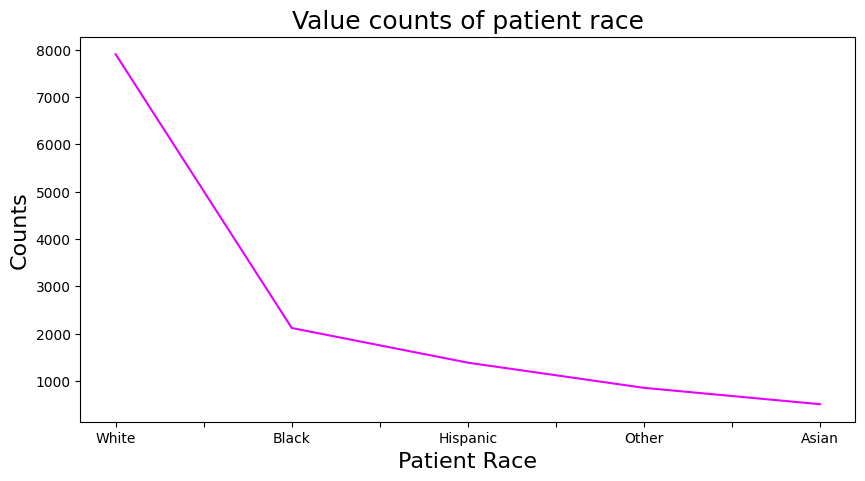

In [ ]:
# comparing patient race
plt.figure(figsize = (10,5))
df['patient_race'].value_counts().plot(kind = 'line', color =  '#E800FF')
plt.title("Value counts of patient race", fontsize = 18)
plt.xlabel('Patient Race', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xticks(rotation = 0)
plt.show()

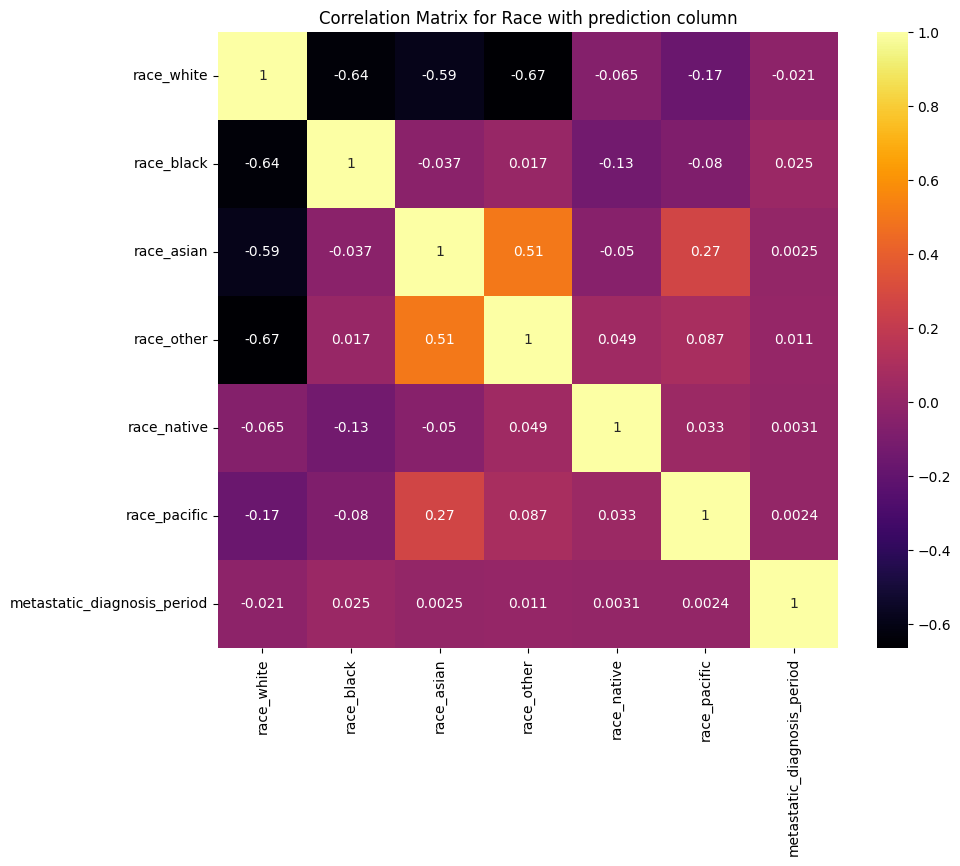

In [9]:
correlation_matrix = train_df[['race_white', 'race_black', 'race_asian','race_other', 'race_native','race_pacific','metastatic_diagnosis_period']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix for Race with prediction column')
plt.show()


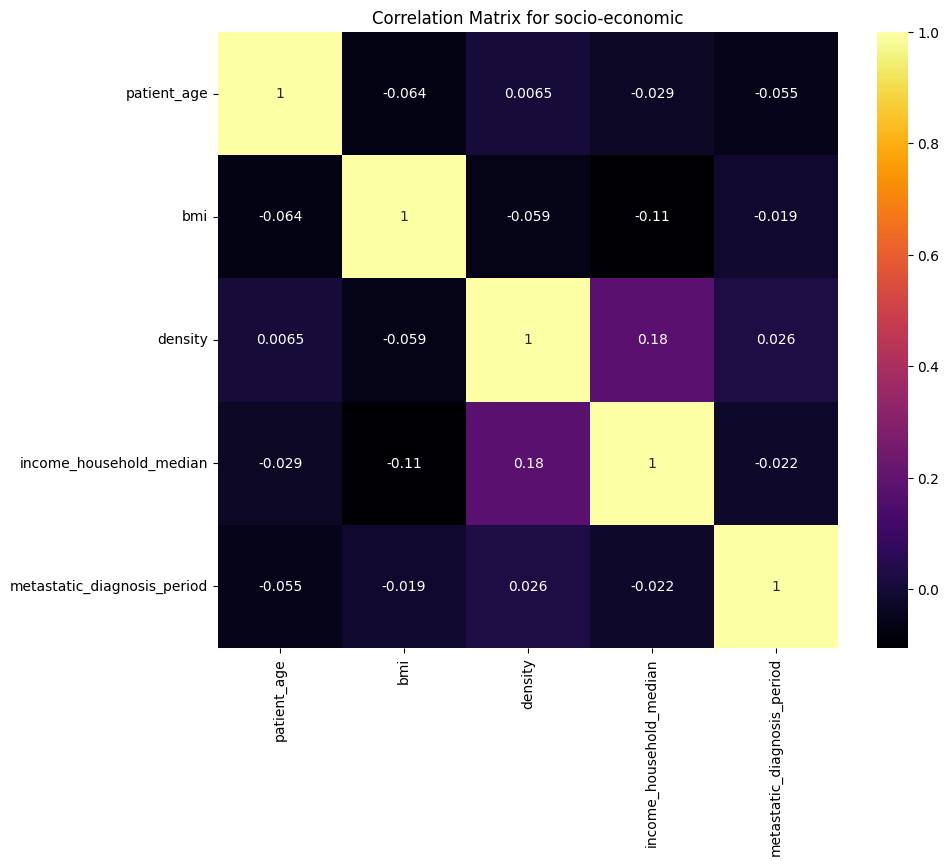

In [10]:
correlation_matrix = train_df[['patient_age', 'bmi', 'density','income_household_median', 'metastatic_diagnosis_period']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix for socio-economic')
plt.show()

#Selecting Features

In [ ]:
# dropping columns that are not required and spearating the data into feature variable and class
X = df.drop(['patient_id', 'patient_race', 'bmi', 'breast_cancer_diagnosis_desc', 'metastatic_diagnosis_period'], axis = 1)
y = df['metastatic_diagnosis_period']

# printing shape of X and shape of y
print(X.shape, y.shape)

X.head()

(12762, 144) (12762,)


,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,0.0,2.0,515.0,2.0,7.0,1,40.0,3.0,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,...,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,0.0,13.0,446.0,0.0,0.0,3,26.0,3.0,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,...,38.55,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
2,0.0,4.0,664.0,3.0,4.0,3,7.0,3.0,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.40,1631.64,35.56,16.25,27.55,33.88,...,63.29,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58
3,1.0,4.0,641.0,3.0,4.0,3,39.0,3.0,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.13,7.84,10.16,14.42,10.48,13.73,18.96,32.69,36053.40,31.50,12949.12,873756.00,1651.15,37.37,22.92,18.24,21.27,...,67.04,59.73,63.27,63.83,67.72,64.39,62.56,69.66,72.21,77.47,76.77,74.50,63.48,57.98,57.69,66.53,61.89,64.86,62.63,70.45,73.09,71.94,72.26,69.56,66.85,58.29,56.08,57.88,63.84,65.03,63

In [ ]:
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns

Index([], dtype='object')

In [ ]:
X[[col]]

,patient_zip3
0,515
1,446
2,664
3,641
4,672
...,...
13168,80
13169,542
13170,667
13171,329


#Handling Categorical Values

- Use Label encoder to convert categorical values to way the model can understand
-Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.
- eg array["apple","mango","guava"] = array[0,1,2]

In [ ]:

# converting categorical features to numerical features
# make an object of LabelEncoder for each categorical features
le_payer_type = LabelEncoder()
le_patient_state = LabelEncoder()
le_patient_zip3 = LabelEncoder()
le_region = LabelEncoder()
le_division = LabelEncoder()
le_breast_cancer = LabelEncoder()
le_metastatic_cancer = LabelEncoder()

# converting categorical features to numerical
X['payer_type'] = le_payer_type.fit_transform(X['payer_type'])
X['patient_state'] = le_patient_state.fit_transform(X['patient_state'])
X['patient_zip3'] = le_patient_zip3.fit_transform(X['patient_zip3'])
X['Region'] = le_region.fit_transform(X['Region'])
X['Division'] = le_division.fit_transform(X['Division'])
X['breast_cancer_diagnosis_code'] = le_breast_cancer.fit_transform(X['breast_cancer_diagnosis_code'])
X['metastatic_cancer_diagnosis_code'] = le_metastatic_cancer.fit_transform(X['metastatic_cancer_diagnosis_code'])

In [ ]:
X.head()

,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,0,2,515,2,7,1,40,3,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,...,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,0,13,446,0,0,3,26,3,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,...,38.55,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
2,0,4,664,3,4,3,7,3,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.40,1631.64,35.56,16.25,27.55,33.88,...,63.29,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58
3,1,4,641,3,4,3,39,3,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.13,7.84,10.16,14.42,10.48,13.73,18.96,32.69,36053.40,31.50,12949.12,873756.00,1651.15,37.37,22.92,18.24,21.27,...,67.04,59.73,63.27,63.83,67.72,64.39,62.56,69.66,72.21,77.47,76.77,74.50,63.48,57.98,57.69,66.53,61.89,64.86,62.63,70.45,73.09,71.94,72.26,69.56,66.85,58.29,56.08,57.88,63.84,65.03,63.90,68.95,73.58,73.62,72.88,73.84,68.87,66.63,63.75,59.8

In [ ]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)
print("Training Size : ", X_train.shape)
print("Testing Size : ", X_test.shape)


Training Size :  (10209, 144)
Testing Size :  (2553, 144)


#Scaling the values
- makes the mean 0 of entire column.

In [ ]:
# standardizing data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [ ]:
# Initializing Random Forest with paramters
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the random forest to training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Get important features
feature_importance = rf.feature_importances_


In [ ]:
# Sort feature importances
sorted_indices = feature_importance.argsort()[::-1]


In [ ]:
# Get the selected features based on importance
num_features_to_select = 13  # Specify the number of features you want to select
selected_features_indices = sorted_indices[:num_features_to_select]
selected_features = X_train.columns[selected_features_indices]

In [ ]:
# Transform training and testing data to contain only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [ ]:
rf.fit(X_train_selected, y_train)

# Evaluate the model on the testing data
accuracy = rf.score(X_test_selected, y_test)

# Print the selected features and model performance
print("Selected Features:", selected_features)
print("Accuracy on Testing Data:",accuracy)

Selected Features: Index(['breast_cancer_diagnosis_code', 'patient_age',
       'metastatic_cancer_diagnosis_code', 'payer_type', 'patient_zip3',
       'commute_time', 'age_40s', 'education_stem_degree',
       'income_household_75_to_100', 'rent_burden',
       'income_household_50_to_75', 'age_over_80', 'age_10_to_19'],
      dtype='object')
Accuracy on Testing Data: 0.30683743071068537


In [ ]:
# Defining RMSE for evaluation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [ ]:
rmse(y_test, rf.predict(X_test_selected))


90.39762265330889

In [ ]:
# Fit initial model
ctb_full = CatBoostRegressor(
    random_state=42,
    verbose=False,
    eval_metric='RMSE'
).fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

rmse(y_test, ctb_full.predict(X_test))


84.4483613162745

In [ ]:
# 1. CatBoost(on selected features)
ctb = CatBoostRegressor(
    random_state=42,
    learning_rate=.02,
    verbose=False,
    eval_metric='RMSE'
).fit(X_train_selected, y_train, eval_set=(X_test_selected, y_test), use_best_model=True)

y_pred_ctb = rmse(y_test, ctb.predict(X_test_selected))

In [ ]:
y_pred_ctb

84.14415907821578

In [ ]:
# Printing Test Data
test_df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,...,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,...,47.82,46.06,41.02,36.88,53.32,62.65,71.13,80.07,81.51,78.66,74.25,61.83,56.03,57.19,40.54,45.32,58.82,60.88,68.38,80.50,82.77,84.21,78.16,65.16,56.42,45.52,47.71,53.46,55.10,69.36,73.91,76.61,81.56,79.72,74.17,64.97,52.08,44.83,37.80,54.41,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,32.33,1742,Malignant neoplasm of upper-inner quadrant of ...,C773,18716.73,1019.51,30.37,11.00,18.86,23.11,12.24,9.88,9.12,8.38,4.78,2.62,50.29,49.71,35.99,12.76,46.65,4.63,3.15,54.23,48238.92,6.12,4.73,6.70,4.86,6.21,11.19,13.28,16.98,10.42,11.80,7.68,19.48,25137.57,47.85,7234.27,125587.7,978.00,...,47.76,44.48,39.89,44.84,53.74,62.94,66.78,77.33,81.05,80.61,76.61,64.45,51.58,45.28,42.63,50.48,57.99,62.86,68.77,78.96,84.92,78.40,73.11,68.57,55.73,43.39,44.61,53.68,59.69,63.29,69.40,79.94,81.16,76.74,73.08,62.92,56.09,43.79,42.14,46.48,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,27.07,1748,Malignant neoplasm of other specified sites of...,C7951,7804.79,140.05,44.32,10.19,12.66,11.70,10.53,12.13,14.91,13.68,9.83,4.36,49.41,50.59,52.22,14.64,25.72,7.42,2.99,45.75,54683.40,3.32,3.42,6.10,5.13,5.54,10.57,14.31,18.18,12.47,12.37,8.57,20.94,

In [ ]:
# Label Encoding of Categorical Features of Test Data
test_df['payer_type'] = le_payer_type.fit_transform(test_df['payer_type'])
test_df['patient_state'] = le_patient_state.fit_transform(test_df['patient_state'])
test_df['patient_zip3'] = le_patient_zip3.fit_transform(test_df['patient_zip3'])
test_df['Region'] = le_region.fit_transform(test_df['Region'])
test_df['Division'] = le_division.fit_transform(test_df['Division'])
test_df['breast_cancer_diagnosis_code'] = le_breast_cancer.fit_transform(test_df['breast_cancer_diagnosis_code'])
test_df['metastatic_cancer_diagnosis_code'] = le_metastatic_cancer.fit_transform(test_df['metastatic_cancer_diagnosis_code'])

In [ ]:
# Select the features from the test Data
test_df_X = test_df[selected_features]
# Predicting the value of test data
test_df_result = ctb.predict(test_df_X)
# Updating the value of diagnosis period
solution_df['metastatic_diagnosis_period'] = test_df_result


In [ ]:
# final submission
solution_df.head()

,patient_id,metastatic_diagnosis_period
0,730681,204.219858
1,334212,51.259391
2,571362,198.174028
3,907331,223.337429
4,208382,60.337760


In [ ]:
solution_df.to_csv("solution5.csv",index=False)